In [116]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy
import matplotlib.pyplot as plt

In [117]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [118]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [119]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [120]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()

df_market_data_scaled = scaler.fit_transform(df_market_data)

print("Mean:", scaler.mean_)
print("Scale (std):", scaler.scale_)
print("Scaled Data:\n", df_market_data_scaled)

Mean: [-2.69686341e-01  4.49714732e+00  1.85787073e-01  1.54569341e+00
 -9.41185366e-02  2.36537432e+02  3.47667956e+02]
Scale (std): [   2.661727      6.29699172    8.27415092   26.02096377   46.78460567
  429.8849143  1232.53134882]
Scaled Data:
 [[ 5.08529366e-01  4.93193071e-01  7.72200433e-01  2.35459633e-01
  -6.74950963e-02 -3.55953481e-01 -2.51636882e-01]
 [ 1.85445894e-01  9.34445040e-01  5.58692121e-01 -5.43409317e-02
  -2.73482725e-01 -1.15759474e-01 -1.99352110e-01]
 [ 2.17739616e-02 -7.06336853e-01 -2.16804207e-02 -6.10301536e-02
   8.00452481e-03 -5.50246924e-01 -2.82060506e-01]
 [-4.07643829e-02 -8.10928066e-01  2.49457974e-01 -5.03879651e-02
  -3.73164019e-01 -4.58258816e-01 -2.95546142e-01]
 [ 1.19303608e+00  2.00095907e+00  1.76061001e+00  5.45842065e-01
  -2.91202870e-01 -4.99847761e-01 -2.70316950e-01]
 [ 8.91870708e-01  1.32729453e+00  8.00214184e-01 -5.71478992e-02
   7.78653106e-01 -1.88231917e-01 -2.25532605e-01]
 [ 1.13972400e-02  2.57225091e+00  1.10164693e+00

In [121]:
# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(df_market_data_scaled, columns=['price_change_percentage_24h', 
                                                         'price_change_percentage_7d',
                                                         'price_change_percentage_14d',
                                                         'price_change_percentage_30d',
                                                         'price_change_percentage_60d',
                                                         'price_change_percentage_200d',
                                                         'price_change_percentage_1y'])

df_scaled

# Copy the crypto names from the original DataFrame
df_scaled.index = df_market_data.index

# Display the scaled DataFrame
df_scaled

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [122]:
# Create a list with the number of k-values from 1 to 11
k = 10
k_values = list(range(1,k+1))
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [123]:
# Create an empty list to store the inertia values
inertia_1 = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(df_scaled)
    inertia_1.append(kmeans.inertia_)

inertia_1


[287.0,
 212.1233420748626,
 165.1367523344681,
 79.02243535120977,
 66.41305075939437,
 61.634088110682214,
 46.074467441030215,
 43.39269411734827,
 32.91322265971525,
 30.469111293270352]

In [124]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': k_values,
    'inertia': inertia_1
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)



In [125]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.

df_elbow.hvplot.line(x='k', y='inertia', title="How many clusters do ya need, bozo. I'm walking here!")

:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [126]:
# Initialize the K-Means model using the best value for k
k_cluster = 4
k_cluster = int(k_cluster)

kmeans = KMeans(n_clusters=k_cluster, random_state=1)

In [127]:
# Fit the K-Means model using the scaled DataFrame
kmeans.fit(df_scaled)

KMeans(n_clusters=4, random_state=1)

In [128]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
predictions = kmeans.predict(df_market_data_scaled)

# Print the resulting array of cluster values.
print(predictions)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


/Users/Kenji-to/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [129]:
# Create a copy of the scaled DataFrame
complete_df = df_scaled.copy()

In [130]:
complete_df

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


In [131]:
print(len(predictions), len(complete_df))


41 41


In [132]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
df_scaled['predicted clusters'] = pd.Series(predictions, index=complete_df.index)

# Display the copy of the scaled DataFrame
df_scaled


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,predicted clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,2
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,2
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,2
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,2


In [133]:

df_scaled['predicted clusters'] = df_scaled['predicted clusters'].astype('category')

plot1 = df_scaled.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="predicted clusters",  # groups data by clusters for distinct colors
    cmap="Category10",  
    hover_cols=["coin_id"],
    title="Cryptocurrency Price Change (24h vs 7d)"
)
plot1

:NdOverlay   [predicted clusters]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [134]:
# Create a PCA model instance and set `n_components=3`.
PCA_model = PCA(n_components=3)

In [135]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
PCA_data = PCA_model.fit_transform(df_scaled)

# View the scaled PCA data
PCA_data

array([[ 4.48907952e-01,  1.24537573e+00,  8.50640396e-01],
       [ 4.95367093e-01,  8.99822995e-01,  1.31755943e+00],
       [-8.18845712e-01, -7.18990907e-02, -6.95015071e-01],
       [-8.40357106e-01, -8.00540676e-02, -5.44359519e-01],
       [ 8.13240044e-01,  2.66952035e+00,  1.64332113e+00],
       [ 8.22870558e-01,  1.68209607e+00,  9.05203458e-01],
       [ 9.13867626e-01,  1.12868393e+00,  2.73003754e+00],
       [ 8.11102222e-01,  1.11337793e+00,  1.59865515e+00],
       [ 2.58728083e-01,  9.46883804e-01,  1.10355990e+00],
       [-1.00392082e+00,  1.19410202e-01, -2.78563993e-01],
       [-1.36328853e+00, -1.24534877e+00, -9.50712158e-01],
       [-8.30643324e-01, -7.70471599e-02, -7.07660520e-01],
       [-1.13545778e+00, -1.71400623e-01, -4.41569215e-01],
       [ 2.08497797e+00,  2.68897925e+00,  7.76469068e-01],
       [-6.33198072e-01,  1.69113551e-02, -2.49426354e-01],
       [-1.61907992e-01,  3.10904366e-01,  1.81852107e+00],
       [-9.96986646e-01, -1.29257396e+00

In [136]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
PCA_variance = PCA_model.explained_variance_ratio_
PCA_variance

array([0.34871677, 0.31363391, 0.22627118])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** PCA1: 0.3487, PCA2: 0.3136 PCA3: 0.2263

In [137]:
# Create a new DataFrame with the PCA data.
dataframe_PCA = pd.DataFrame(PCA_data, columns = ['PC1', 'PC2', 'PC3'])

# Copy the crypto names from the original scaled DataFrame
dataframe_PCA['coin_id'] = df_scaled.index

# Set the coin_id column as index
dataframe_PCA = dataframe_PCA.set_index('coin_id')

# Display the scaled PCA DataFrame
dataframe_PCA

,PC1,PC2,PC3
coin_id,,,
bitcoin,0.448908,1.245376,0.850640
ethereum,0.495367,0.899823,1.317559
tether,-0.818846,-0.071899,-0.695015
ripple,-0.840357,-0.080054,-0.544360
bitcoin-cash,0.813240,2.669520,1.643321
binancecoin,0.822871,1.682096,0.905203
chainlink,0.913868,1.128684,2.730038
cardano,0.811102,1.113378,1.598655
litecoin,0.258728,0.946884,1.103560


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [138]:
# Create a list with the number of k-values from 1 to 11
k = 10
k_values = list(range(1,k+1))
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [139]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(dataframe_PCA)
    inertia.append(kmeans.inertia_)

inertia

[290.62269398796445,
 207.30743902517543,
 123.1269505632784,
 44.13060225321718,
 33.21742725515243,
 23.374713031741763,
 20.94307739452342,
 18.666961001043973,
 13.640110276427905,
 10.287149461797643]

In [140]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': k_values,
    'inertia': inertia
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)
df_elbow


,k,inertia
0,1,290.622694
1,2,207.307439
2,3,123.126951
3,4,44.130602
4,5,33.217427
5,6,23.374713
6,7,20.943077
7,8,18.666961
8,9,13.640110
9,10,10.287149


In [141]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
df_elbow.hvplot.line(x='k', y='inertia', title="How many clusters do ya need for PCA, bozo. I'm walking here!")

:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No? Now I feel like you're trying to trick me.

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [142]:
# Initialize the K-Means model using the best value for k
k_cluster = 4
k_cluster = int(k_cluster)

kmeans = KMeans(n_clusters=k_cluster, random_state=1)

In [143]:
# Fit the K-Means model using the PCA data
kmeans.fit(dataframe_PCA)

KMeans(n_clusters=4, random_state=1)

In [144]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
df_PCA_scaled = scaler.fit_transform(dataframe_PCA)

predictions_PCA = kmeans.predict(df_PCA_scaled)

# Print the resulting array of cluster values.
print(predictions_PCA)

[1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 3 1 0 0 2
 0 0 0 0]


/Users/Kenji-to/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [145]:
df_PCA_scaled = pd.DataFrame(dataframe_PCA)
df_PCA_scaled

,PC1,PC2,PC3
coin_id,,,
bitcoin,0.448908,1.245376,0.850640
ethereum,0.495367,0.899823,1.317559
tether,-0.818846,-0.071899,-0.695015
ripple,-0.840357,-0.080054,-0.544360
bitcoin-cash,0.813240,2.669520,1.643321
binancecoin,0.822871,1.682096,0.905203
chainlink,0.913868,1.128684,2.730038
cardano,0.811102,1.113378,1.598655
litecoin,0.258728,0.946884,1.103560


In [146]:
# Create a copy of the scaled PCA DataFrame
copy_df = df_PCA_scaled.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
copy_df['predicted clusters'] = pd.Series(predictions_PCA, index=copy_df.index)

# Display the copy of the scaled PCA DataFrame
copy_df

,PC1,PC2,PC3,predicted clusters
coin_id,,,,
bitcoin,0.448908,1.245376,0.850640,1
ethereum,0.495367,0.899823,1.317559,1
tether,-0.818846,-0.071899,-0.695015,0
ripple,-0.840357,-0.080054,-0.544360,0
bitcoin-cash,0.813240,2.669520,1.643321,1
binancecoin,0.822871,1.682096,0.905203,1
chainlink,0.913868,1.128684,2.730038,1
cardano,0.811102,1.113378,1.598655,1
litecoin,0.258728,0.946884,1.103560,1


In [147]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
plot = copy_df.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="predicted clusters",  # groups data by clusters for distinct colors
    cmap="Category10",  
    hover_cols=["coin_id"],
    title="PCA1 v.s. PCA2"
)
plot

:NdOverlay   [predicted clusters]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

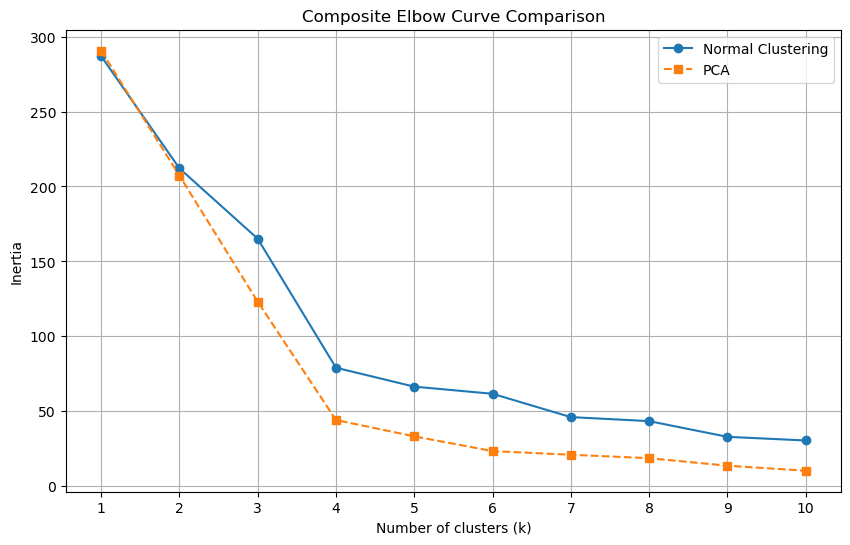

In [148]:
# Composite plot to contrast the Elbow curves
# YOUR CODE HERE!

plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_1, marker='o', linestyle='-', label='Normal Clustering')
plt.plot(k_values, inertia, marker='s', linestyle='--', label='PCA')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Composite Elbow Curve Comparison')
plt.xticks(k_values) 
plt.legend()
plt.grid(True)
plt.show()

In [149]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!
composite_plot = (plot1 + plot)
composite_plot

:Layout
   .NdOverlay.I  :NdOverlay   [predicted clusters]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [predicted clusters]
      :Scatter   [PC1]   (PC2,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 